## Essential Libraries


In [ ]:
!pip install scikit-dimension
!pip install umap-learn
!pip install --upgrade scikit-learn
!pip install --upgrade gap-stat
!pip install scikit-network
!pip install dask[complete] dask_ml
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 19.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=fd350616c1bee31605bf2647ce53aeb6f7979c32c0ece255552ec086242b7811
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=39859bc371370306cd21a79f5d195ea32d11fbbc74f95c5c9d6f50dc6a680407
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-py

## Loading Dataset from Google Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R41.zip' R41.zip

In [ ]:
!unzip R41.zip

Archive:  R41.zip
  inflating: R41.txt                 


In [ ]:
!head R41.txt

25 119651 _ _ 100

25.68 14.06 34.02 6.90 14.37 39.54 36.66 1.04 6.02 4.27 38.39 4.10 21.96 4.17 25.48 0.50 9.85 20.04 40.35 13.90 8.96 38.54 24.15 8.35 34.42
29.52 14.29 34.07 7.05 14.39 39.70 36.69 0.82 5.66 4.11 38.47 4.05 21.71 4.04 25.61 0.55 9.63 19.93 40.35 14.07 8.82 38.75 23.64 8.80 28.81
37.03 15.15 33.87 7.19 14.23 39.61 36.43 1.22 6.24 4.21 38.12 4.12 21.86 4.37 25.43 0.49 9.83 19.99 40.19 13.86 9.24 39.03 22.91 9.17 16.15
41.92 15.53 33.73 7.25 14.40 39.50 36.63 1.35 6.18 4.10 38.38 3.93 21.94 3.99 25.30 0.64 9.89 20.19 40.42 13.77 9.31 39.17 22.43 9.76 8.12
32.06 14.62 33.94 7.18 14.31 39.55 36.49 0.99 6.04 4.10 38.39 4.19 21.81 3.92 25.22 0.52 9.52 19.98 40.46 13.70 9.15 38.73 23.55 8.76 24.44
35.51 15.23 33.90 7.05 14.37 39.45 36.94 1.13 6.03 4.20 38.52 3.96 21.94 4.04 25.50 0.49 9.68 20.09 40.47 13.91 9.34 38.88 23.08 9.16 18.39
33.21 14.79 33.87 7.17 14.23 39.68 36.58 1.15 5.99 4.16 38.63 4.18 21.68 4.08 25.41 0.45 9.83 19.86 40.36 13.72 9.11 38.84 23.31 8.88 22.52
19

In [ ]:
with open('R41.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, p = [int(item) for item in line if item!='_']
  # line = fp.readline()
  # line = line.split(' ')
  # K = [int(item) for item in line]


In [ ]:
!tail -n +3 R41.txt > R41_clean.txt

In [ ]:
vectors = np.fromfile('R41_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors.shape

(119651, 25)

In [ ]:
from sklearn.neighbors import KDTree

def detect_outliers_knn(points):
  tree = KDTree(points)
  dists = []
  for point in tqdm(range(points.shape[0])):
    dist, ind = tree.query(points[point:point+1, :], k=8)
    dists.append((dist[0][1:].max(), ind[0][0]))
  return dists

outlier_ind = []
if p > 0:
  outlier_dists = sorted(detect_outliers_knn(vectors), key=lambda x: x[0])
  outlier_ind = [x[1] for x in outlier_dists[-p:]]

  0%|          | 0/119651 [00:00<?, ?it/s]

In [ ]:
outlier_ind

[5270,
 679,
 8817,
 1000,
 1431,
 42767,
 11973,
 1265,
 732,
 372,
 2908,
 2924,
 9796,
 1902,
 2704,
 3555,
 766,
 2105,
 16235,
 1355,
 741,
 14998,
 1328,
 21955,
 32676,
 7824,
 1507,
 1729,
 4205,
 4549,
 2020,
 11580,
 1540,
 1936,
 1230,
 3312,
 26269,
 2061,
 1513,
 5064,
 1293,
 4197,
 1476,
 2383,
 1726,
 1166,
 7440,
 1891,
 1971,
 7596,
 1239,
 20631,
 816,
 1297,
 22051,
 2363,
 1786,
 181,
 842,
 1876,
 6117,
 7091,
 24373,
 1580,
 32541,
 874,
 1035,
 596,
 1570,
 25677,
 74,
 45941,
 712,
 724,
 1438,
 16976,
 37236,
 4357,
 7520,
 3889,
 1135,
 24872,
 379,
 1584,
 3043,
 12593,
 35303,
 33,
 1905,
 665,
 12347,
 554,
 45321,
 24107,
 303,
 8019,
 1025,
 810,
 1728,
 1041]

## Shuffling and Partitioning the dataset

In [ ]:
sample_size = 25000

np.random.seed(0)
pop = np.array(list(set(range(vectors.shape[0])) - set(outlier_ind)))
main_vectors_ind = list(np.random.choice(a=pop, replace=False, size=sample_size))
main_vectors = vectors[main_vectors_ind,:]

In [ ]:
main_vectors.shape

(15000, 25)

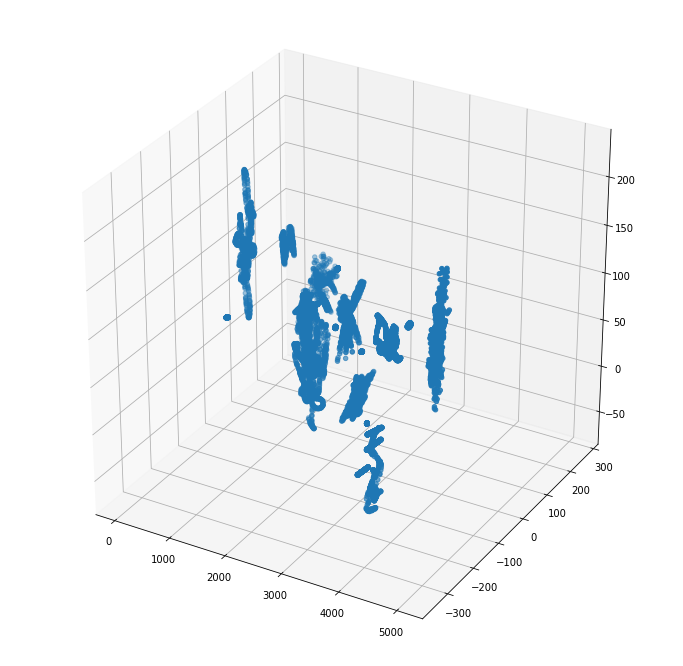

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
def manifold_sampler(X, n_samples, n_outliers=0):
  N = X.shape[0]
  k_n = int(N / n_samples) + 1
  W = np.zeros(N)
  # computing density of samples
  tree = KDTree(X)
  for point in tqdm(range(N)):
    dist, _ = tree.query(X[point:point+1], k=32)
    dist = dist[0][1:]
    W[point] = 1.0 / (1.0 + dist.mean())
  
  landmarks = np.random.choice(N, size=n_samples+n_outliers, replace=False)
  samples = []
  for point in tqdm(range(landmarks.shape[0])):
      l = landmarks[point]
      _, neighbors = tree.query(X[l:l+1], k=k_n)
      neighbors = neighbors[0]
      W_n = W[neighbors]
      W_n /= W_n.sum()
      selected = np.random.choice(neighbors, size=1, p=W_n)[0]
      samples.append(selected)
  samples = np.array(samples)
  return samples

In [ ]:
main_vectors_ind = manifold_sampler(vectors, 15000, p)
main_vectors_ind = main_vectors_ind[np.logical_not(np.isin(main_vectors_ind, np.array(outlier_ind)))]
main_vectors = vectors[main_vectors_ind]

  0%|          | 0/119651 [00:00<?, ?it/s]

  0%|          | 0/15100 [00:00<?, ?it/s]

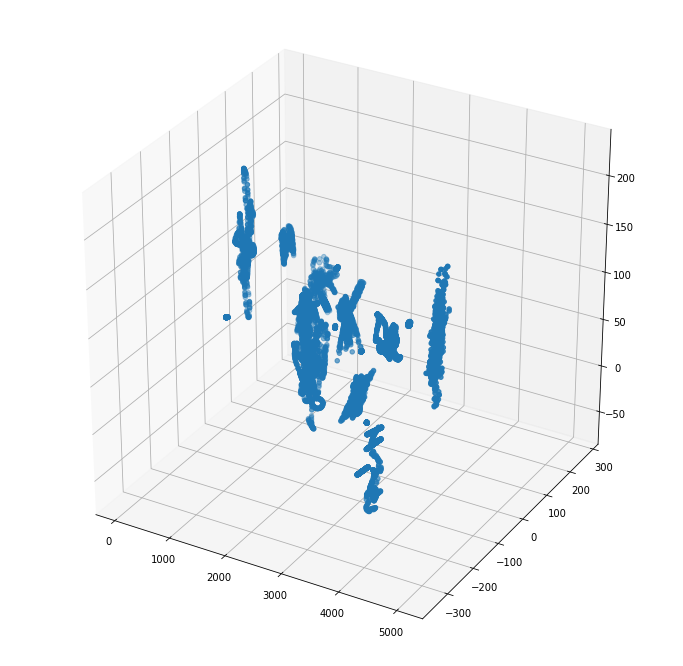

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
reduced = reducer.fit_transform(main_vectors)

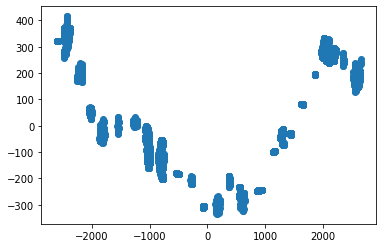

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1])

In [ ]:
from sknetwork.utils import KNNDense

knn_graph = KNNDense(n_neighbors=10).fit_transform(main_vectors)

In [ ]:
from sknetwork.clustering import Louvain

louvain = Louvain(resolution=0.00001)
labels = louvain.fit_transform(knn_graph)

In [ ]:
len(np.unique(labels))

45

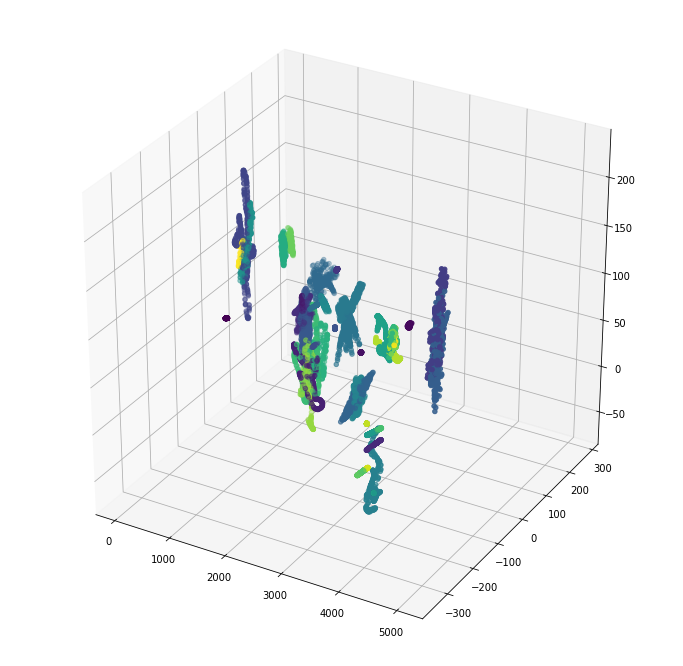

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

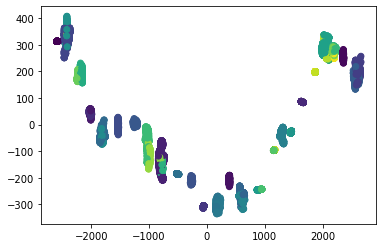

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels)

In [ ]:
import scipy
from functools import lru_cache
from sklearn.covariance import ledoit_wolf
from numba import jit
from scipy.special import softmax

class SparseAffinity():
  def __init__(self, n_data):
    self.n = n_data
    self.storage = [{} for _ in range(self.n)]
  
  def add(self, i, j):
    if j > i:
      i, j = j, i
    
    if not (j in self.storage[i]):
      self.storage[i][j] = 1.0
    else:
      self.storage[i][j] += 1.0
  
  def sparse(self):
    data = []
    row_index = []
    col_index = []

    for i in range(self.n):
      for j,v in self.storage[i].items():
        row_index.append(i)
        col_index.append(j)
        data.append(v)
    
    S = scipy.sparse.csr_matrix((data, (row_index, col_index)),shape=(self.n, self.n))
    return S + S.T
        

class RandomWalkAffinity():  
  def __init__(self, X, tree, path_length):
    self.X = X
    self.tree = tree
    self.path_length = path_length
    self.matrix = SparseAffinity(X.shape[0])

  def get_neighbors(self, point, return_dist=False, drop_first=False, k=16):
    dists, neighbors = self.tree.query(self.X[point:point+1], k=k)
    s = 0
    if drop_first:
      s = 1
    neighbors = neighbors[0][s:]
    dists = dists[0][s:]
    
    if return_dist:
      return neighbors, dists

    return neighbors

  @lru_cache(maxsize=15000)
  def local_cov(self, point):
    neighbors = self.get_neighbors(point, k=64)
    # cov = ledoit_wolf(self.X[neighbors, :])[0]
    cov = np.cov(self.X[neighbors, :])
    return cov

  def cov_sim(self, a, b):
    if a == b:
      return 1.0

    cov_a = self.local_cov(a)
    cov_b = self.local_cov(b)
    dist =  np.linalg.norm(cov_a - cov_b, ord='nuc')
    return 1.0 / (1.0 + dist)
  
  def next_point(self, point, get_probs=False):
    neighbors, dists = self.get_neighbors(point, k=64,
                                          return_dist=True, drop_first=True)
    cov_sim = []
    for n in neighbors:
      cov_sim.append(self.cov_sim(point, n))
    cov_sim = np.array(cov_sim)
    cov_sim /= cov_sim.sum()

    dists = 1.0 / (1 + dists)
    dists /= dists.sum()

    probs = dists * softmax(cov_sim)
    probs /= probs.sum()

    if get_probs:
      return neighbors, probs

    next_point = np.random.choice(neighbors, size=1, p=probs)[0]

    return next_point


  def sample_path(self, initial):
    N = self.X.shape[0]
    path = [initial]
    for hop in range(self.path_length):
      path.append(self.next_point(path[-1]))
    
    for i in range(self.path_length):
      self.matrix.add(path[i], path[i])
      for j in range(i):
        self.matrix.add(path[i], path[j])
  
  def simulate(self):
    N = self.X.shape[0]
    for point in tqdm(range(N)):
      self.sample_path(point)

  def get_transion_matrix(self):
    N = self.X.shape[0]
    matrix = np.zeros((N, N))

    for point in tqdm(range(N)):
      neighbors, probs = self.next_point(point, get_probs=True)
      for n in range(len(neighbors)):
        matrix[point, neighbors[n]] = probs[n]
        matrix[neighbors[n], point] = probs[n]
    
    return scipy.sparse.csr_matrix(matrix)


    

In [ ]:
ra = RandomWalkAffinity(main_vectors, KDTree(main_vectors), 12)

In [ ]:
# ra.simulate()

## Computing the eigenvectors of the similarity matrix

In [ ]:
probs_matrix = ra.get_transion_matrix()

  0%|          | 0/15093 [00:00<?, ?it/s]

In [ ]:
L = scipy.sparse.csgraph.laplacian(probs_matrix)

In [ ]:
L

<15093x15093 sparse matrix of type '<class 'numpy.float64'>'
	with 1114867 stored elements in COOrdinate format>

In [ ]:
# sparse eigen value
top_eigvals, top_eigvecs = scipy.sparse.linalg.eigsh(L, k=40, which='SM')

In [ ]:
top_eigvecs.shape

(15093, 40)

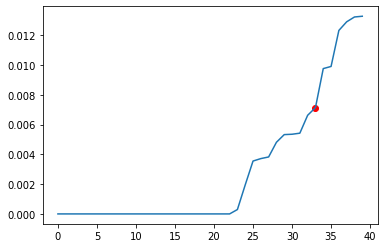

In [ ]:
point = 33
plt.scatter(point, top_eigvals[point], c='red')
_ = plt.plot(top_eigvals)

In [ ]:
m = 32
k = int(1.5 * m)

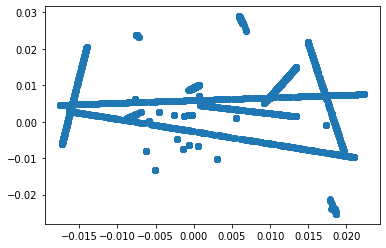

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
reduced_eig_vecs = pca.fit_transform(top_eigvecs[:, :32])

_ = plt.scatter(reduced_eig_vecs[:, 0], reduced_eig_vecs[:, 1])

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=m, covariance_type='full', n_init=8, random_state=0)
gmm.fit(top_eigvecs[:, :m])

GaussianMixture(n_components=32, n_init=8, random_state=0)

## Spectral Clustring Based on Random Walks

In [ ]:
labels = gmm.predict(top_eigvecs[:, :m])

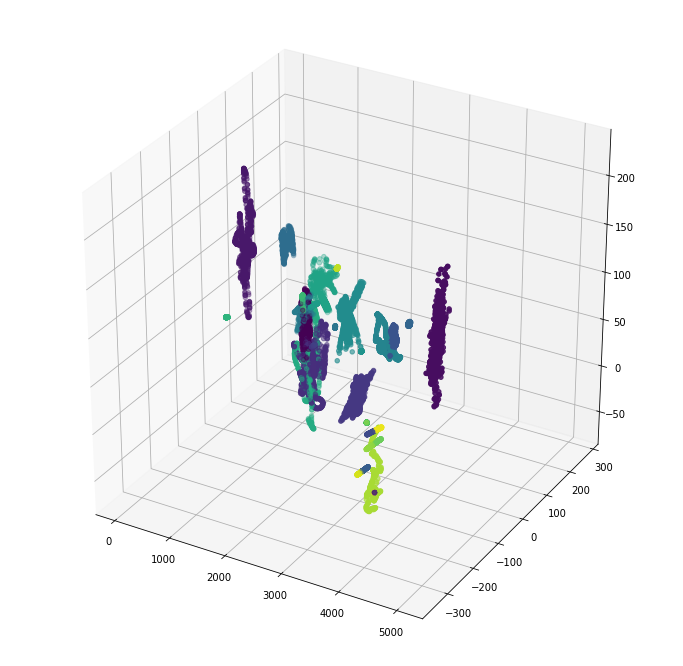

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(main_vectors, labels)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
global_labels = clf.predict(vectors)

In [ ]:
global_labels[outlier_ind] = -1

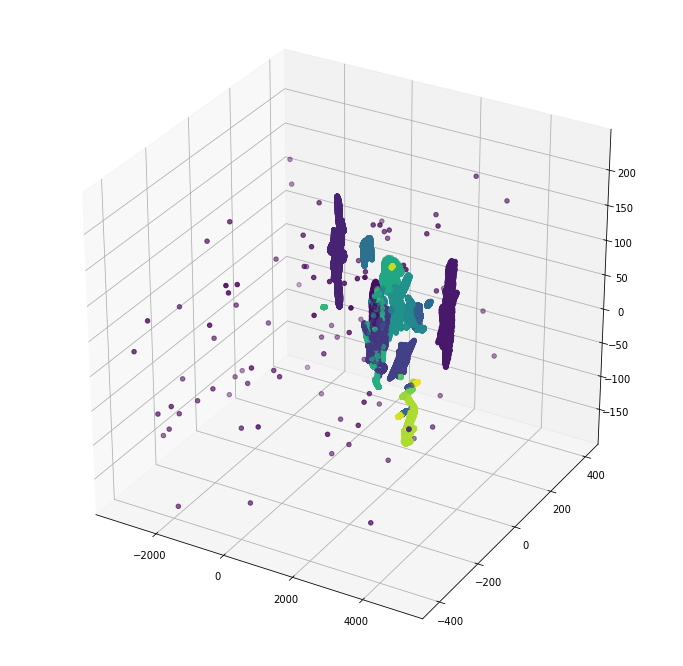

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=global_labels)
_ = plt.show()

In [ ]:
from gap_statistic import OptimalK
from sknetwork.utils import KNNDense
from sknetwork.clustering import Louvain


def estimate_n_clusters_louvain(s_vectors):
  knn_graph = KNNDense().fit_transform(s_vectors)
  louvain = Louvain(resolution=1.0)
  labels = louvain.fit_transform(knn_graph)
  return labels.max()


def estimate_n_clusters(s_vectors):
  s_local_tangent = get_local_tangent(s_vectors, n_neighbors=21)
  s_probs_matrix = adjusted_random_walk(s_vectors, s_local_tangent,
                                        n_neighbors=32, path_length=16, steps=2)

  s_L = sparse.csgraph.laplacian(s_probs_matrix)
  s_top_eigvals, s_top_eigvecs = sparse.linalg.eigsh(s_L, k=3, which='SM')

  optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')
  n_clusters = optimalK(s_top_eigvecs, cluster_array=np.arange(1, 10))

  return n_clusters



manifolds_K = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 1000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  n_clusters = estimate_n_clusters_louvain(s_vectors)
  print(f'Manifold {manifold} contains {n_clusters} sub-clusters.')
  manifolds_K.append(n_clusters)




Manifold 0 contains 12 sub-clusters.
Manifold 1 contains 27 sub-clusters.
Manifold 2 contains 40 sub-clusters.
Manifold 3 contains 23 sub-clusters.
Manifold 4 contains 41 sub-clusters.
Manifold 5 contains 23 sub-clusters.
Manifold 6 contains 13 sub-clusters.
Manifold 7 contains 19 sub-clusters.
Manifold 8 contains 38 sub-clusters.
Manifold 9 contains 20 sub-clusters.
Manifold 10 contains 13 sub-clusters.
Manifold 11 contains 23 sub-clusters.
Manifold 12 contains 15 sub-clusters.
Manifold 13 contains 27 sub-clusters.
Manifold 14 contains 40 sub-clusters.
Manifold 15 contains 26 sub-clusters.
Manifold 16 contains 12 sub-clusters.
Manifold 17 contains 24 sub-clusters.
Manifold 18 contains 28 sub-clusters.
Manifold 19 contains 42 sub-clusters.
Manifold 20 contains 22 sub-clusters.
Manifold 21 contains 27 sub-clusters.
Manifold 22 contains 24 sub-clusters.
Manifold 23 contains 26 sub-clusters.
Manifold 24 contains 20 sub-clusters.
Manifold 25 contains 25 sub-clusters.
Manifold 26 contains 1

In [ ]:
manifolds_K_w = 1.0 * np.array(manifolds_K)
manifolds_K_w /= manifolds_K_w.sum()
K = np.maximum(np.round(manifolds_K_w * k), 1).astype(int)

In [ ]:
K

array([1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1])

In [ ]:
import skdim.id as intd

manifold_dims = []

for sphere in tqdm(range(m)):
  lpca = intd.lPCA().fit_pw(vectors[global_labels==sphere], n_neighbors = 128, n_jobs = 1)
  manifold_dims.append(int(np.round(np.quantile(lpca.dimension_pw_, 0.2))))
  

  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
manifold_dims

[12,
 3,
 2,
 1,
 1,
 2,
 12,
 4,
 2,
 8,
 12,
 2,
 10,
 3,
 1,
 3,
 13,
 1,
 3,
 2,
 11,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 7,
 3,
 1]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


class AffineManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    XS = X - self.shift
    self.dim = X.shape[1] - self.int_dim
    self.pca = PCA()
    self.pca.fit(XS)
  
  def check(self, thresh=0.1):
    ev = self.pca.explained_variance_[-self.dim:].mean()
    if ev < thresh:
      return True
    return False
  
  def get_affine(self):
    a = self.pca.components_[-self.dim:]
    b = a @ self.shift
    a = a.T
    return a, b
    
class SphereManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    self.dim = X.shape[1] - self.int_dim
    center, radius = self.noisy_center_radius(X, 5)
    self.center = center
    self.radius = radius
    error = np.abs(np.linalg.norm(X - center, axis=1) - radius)
    self.error_std = np.std(error)
    self.error_mean = np.mean(error)
    self.aff = AffineManifold(self.int_dim)
    self.aff.fit(X)

  def check(self, thresh=5.0):
    # print('std ', self.error_std)
    # print('mean', self.error_mean)
    # print('radius', self.radius)
    if (self.error_std < thresh) and (self.error_mean < 0.3*self.radius):
      return True
    return False

  def noisy_center_radius(self, points, k):
    dist_matrix = np.zeros((points.shape[0], points.shape[0]))
    for i in range(points.shape[0]):
      for j in range(i):
        dist = np.linalg.norm(points[i] - points[j])
        dist_matrix[i, j] = dist
    dist_matrix = dist_matrix.reshape(-1)
    top_k_dist = np.argsort(dist_matrix)[-k:]
    rows = top_k_dist // points.shape[0]
    cols = top_k_dist % points.shape[0]
    center = 0.5*(points[cols] + points[rows]).mean(axis=0)
    radius = dist_matrix[top_k_dist].mean()/2
    return center, radius
  
  def get_affine(self):
    return self.aff.get_affine()
  



def manifold_type(points, int_d):
  sph = SphereManifold(int_d)
  sph.fit(points)
  if sph.check():
    return 'Sphere', sph
  # test affinity
  aff = AffineManifold(int_d)
  aff.fit(points)
  if aff.check():
    return 'Affine', aff
  return 'Complex', None

manifolds_types = []
manifolds_specs = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 1200)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  mantype, spec = manifold_type(s_vectors, manifold_dims[manifold])
  print(f'Manifold {manifold} is {manifold_dims[manifold]}-{mantype}')
  manifolds_types.append(mantype)
  manifolds_specs.append(spec)

Manifold 0 is 12-Sphere
Manifold 1 is 3-Complex
Manifold 2 is 2-Complex
Manifold 3 is 1-Sphere
Manifold 4 is 1-Complex
Manifold 5 is 2-Complex
Manifold 6 is 12-Sphere
Manifold 7 is 4-Affine
Manifold 8 is 2-Complex
Manifold 9 is 8-Affine
Manifold 10 is 12-Sphere
Manifold 11 is 2-Complex
Manifold 12 is 10-Sphere
Manifold 13 is 3-Complex
Manifold 14 is 1-Complex
Manifold 15 is 3-Complex
Manifold 16 is 13-Sphere
Manifold 17 is 1-Affine
Manifold 18 is 3-Complex
Manifold 19 is 2-Complex
Manifold 20 is 11-Affine
Manifold 21 is 3-Complex
Manifold 22 is 2-Affine
Manifold 23 is 2-Affine
Manifold 24 is 3-Affine
Manifold 25 is 2-Affine
Manifold 26 is 3-Affine
Manifold 27 is 1-Complex
Manifold 28 is 2-Affine
Manifold 29 is 7-Affine
Manifold 30 is 3-Affine
Manifold 31 is 1-Complex


In [ ]:
np.unique(global_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


sub_clusters = []
for sphere in tqdm(range(m)):
  points = vectors[global_labels==sphere]
  original_index = np.where(global_labels==sphere)[0]

  sub_manifold_size = points.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  # s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_sample_ind = manifold_sampler(points, s_sample_size)
  s_vectors = points[s_sample_ind, :]

  s_cluster = SpectralClustering(n_clusters=K[sphere], random_state=0, affinity='nearest_neighbors')
  s_cluster.fit(s_vectors)

  s_labels = s_cluster.labels_

  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(s_vectors, s_labels)

  sub_manifold_labels = clf.predict(points)


  submanifold_clusters = []
  for subc in range(K[sphere]):
    submanifold_clusters.append(original_index[np.where(sub_manifold_labels == subc)])
  sub_clusters.append(submanifold_clusters)

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/3443 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7080 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6640 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2307 [00:00<?, ?it/s]

  0%|          | 0/2307 [00:00<?, ?it/s]

  0%|          | 0/7810 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6252 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3686 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2436 [00:00<?, ?it/s]

  0%|          | 0/2436 [00:00<?, ?it/s]

  0%|          | 0/4128 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/4377 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3761 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3412 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4071 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4218 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6128 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4674 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3348 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6156 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3453 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4207 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4071 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1337 [00:00<?, ?it/s]

  0%|          | 0/1337 [00:00<?, ?it/s]

  0%|          | 0/1285 [00:00<?, ?it/s]

  0%|          | 0/1285 [00:00<?, ?it/s]

  0%|          | 0/2020 [00:00<?, ?it/s]

  0%|          | 0/2020 [00:00<?, ?it/s]

  0%|          | 0/1030 [00:00<?, ?it/s]

  0%|          | 0/1030 [00:00<?, ?it/s]

  0%|          | 0/2124 [00:00<?, ?it/s]

  0%|          | 0/2124 [00:00<?, ?it/s]

  0%|          | 0/3111 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3946 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1931 [00:00<?, ?it/s]

  0%|          | 0/1931 [00:00<?, ?it/s]

  0%|          | 0/2192 [00:00<?, ?it/s]

  0%|          | 0/2192 [00:00<?, ?it/s]

  0%|          | 0/2371 [00:00<?, ?it/s]

  0%|          | 0/2371 [00:00<?, ?it/s]

In [ ]:
with open('output_rose.txt', 'w+') as fp:
  fp.write(f'{n} {m}\n')
  for manifold in range(m):
    fp.write(f'{manifold_dims[manifold]} {K[manifold]} {manifolds_types[manifold]}\n')
    if manifolds_types[manifold] in ['Affine', 'Sphere']:
      if manifold_dims[manifold] == d:
        fp.write('\n')
      else:
        spec = manifolds_specs[manifold]
        affine_a, affine_b = spec.get_affine()
        for i in range(affine_a.shape[1]):
          fp.write(' '.join(affine_a[:, i].astype(str).tolist()) + '\n')
        fp.write(' '.join(affine_b.astype(str).tolist()) + '\n')
      if manifolds_types[manifold] == 'Sphere':
        fp.write(' '.join(spec.center.astype(str).tolist()) + f' {spec.radius} \n')
    for subc in range(K[manifold]):
      subc_points = sub_clusters[manifold][subc]
      fp.write(f'{len(subc_points)} ')
      fp.write(' '.join((subc_points+1).astype(str).tolist()))
      fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((np.array(outlier_ind)+1).astype(str).tolist()))